In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')

## Cleaning

#### Processing Survived

In [3]:
df.rename(index=str, columns={'Survived': 'survived'}, inplace=True)

#### Change Sex column to 'is_male' boolean

In [5]:
df.rename(index=str, columns={'Sex': 'is_male'}, inplace=True)
df.is_male = (df.is_male == 'male').map(int);

#### Removing passengers that paid no fare

In [6]:
df.rename(index=str, columns={'Fare': 'fare'}, inplace=True)
df = df.loc[df.fare != 0, :]

#### Processing age feature
"Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5"

In [7]:
df.rename(index=str, columns={'Age': 'age'}, inplace=True)

df = df.loc[df.isnull().age.map(lambda b: not b),:]

def handle_estimated_age(n):
    return int(n)

df.age = df.age.map(handle_estimated_age)

df.age.unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74], dtype=int64)

## Graphing

#### Selecting for columns relevant to graph

In [8]:
df = df[['survived', 'is_male', 'age', 'fare']]

In [10]:
df_survived = df.loc[df.survived == 1, :]
df_kicked_the_bucket = df.loc[df.survived != 1, :]

Text(0.5,1,'Ticket Price vs. Age')

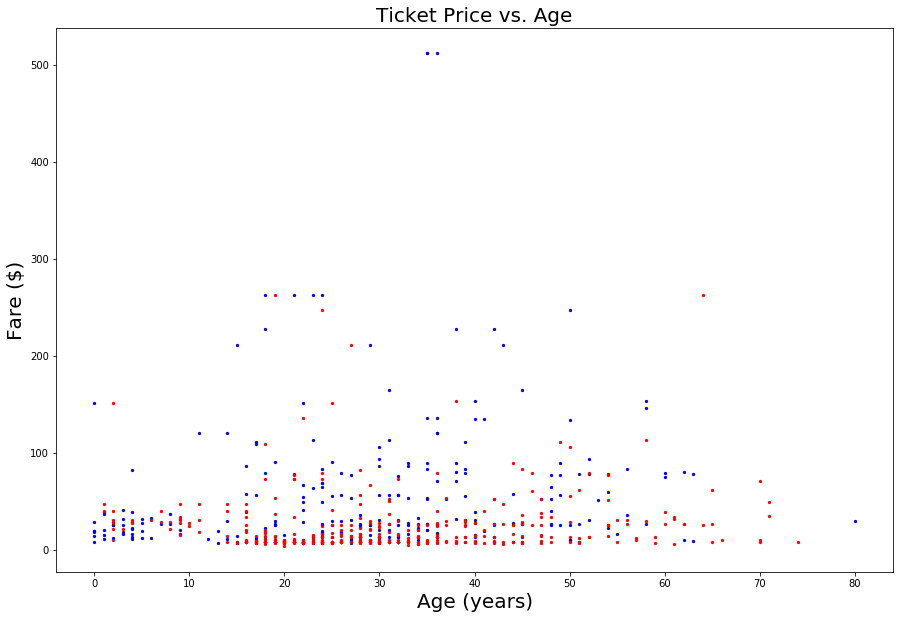

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(df_survived.age, df_survived.fare, s=5, color='blue')
plt.scatter(df_kicked_the_bucket.age, df_kicked_the_bucket.fare, s=5, color='red')
plt.xlabel('Age (years)', fontsize=20)
plt.ylabel('Fare ($)', fontsize=20)
plt.title('Ticket Price vs. Age', fontsize=20)

## Data Check

In [12]:
df.head(10)

,survived,is_male,age,fare
0,0,1,22,7.2500
1,1,0,38,71.2833
2,1,0,26,7.9250
3,1,0,35,53.1000
4,0,1,35,8.0500
6,0,1,54,51.8625
7,0,1,2,21.0750
8,1,0,27,11.1333
9,1,0,14,30.0708
10,1,0,4,16.7000


In [13]:
df.describe()

,survived,is_male,age,fare
count,707.000000,707.000000,707.000000,707.000000
mean,0.408769,0.630835,29.625177,35.038024
std,0.491955,0.482920,14.568859,53.067186
min,0.000000,0.000000,0.000000,4.012500
25%,0.000000,0.000000,20.000000,8.050000
50%,0.000000,1.000000,28.000000,15.850000
75%,1.000000,1.000000,38.000000,34.197900
max,1.000000,1.000000,80.000000,512.329200
